# 1. Feature Engineering Objective.

“This notebook focuses exclusively on feature engineering and exploratory analysis. Model training and evaluation are handled separately to ensure modularity and reproducibility.”

The objective of feature engineering in this project is to transform raw loan applicant data into a **consistent, numerical, and model-ready format** while preserving the underlying information relevant to **loan default risk**. Since the dataset contains a mix of numerical and categorical variables, appropriate preprocessing is required to ensure that all models can effectively learn from the data.

Feature engineering will be performed with the following principles in mind:

- **Identifier columns** (such as unique loan IDs) will be excluded, as they do not carry predictive information.
- **Numerical and categorical features** will be handled using suitable transformations to ensure compatibility with machine learning algorithms.
- **Data leakage will be strictly avoided** by learning all preprocessing steps exclusively from the training data.
- **A consistent engineered feature set** will be used across all models to enable fair and meaningful comparison between algorithms.
- The **feature engineering pipeline will be reproducible and deployment-ready**, allowing the trained model to be reliably applied to unseen data.

This approach ensures that the engineered features support **robust model training**, **reliable evaluation**, and **future deployment** without introducing bias or inconsistencies.


# 2.Feature Selection and Preprocessing Strategy

This section outlines the strategy used to select relevant features and apply appropriate preprocessing steps to prepare the dataset for machine learning models. The goal is to ensure that all features are in a suitable format for learning while maintaining consistency, interpretability, and fairness across models.

---

## Feature Selection

- **Identifier columns** (e.g., `LoanID`) are removed prior to modeling, as they do not contain predictive information and may introduce noise.
- All remaining features are retained at this stage to allow downstream models and feature importance techniques to determine their relative contribution.
- Feature selection decisions are deferred until after baseline model evaluation to avoid premature information loss.

---

## Numerical Feature Preprocessing

- Numerical features are inspected for scale differences, distribution patterns, and outliers.
- Since numerical variables span different ranges (e.g., Income vs. DTIRatio), **feature scaling** will be applied where required:
  - Scaling is especially important for distance-based and linear models (e.g., Logistic Regression, Neural Networks).
- Tree-based models (Decision Trees, Random Forests, XGBoost) will be trained on the same scaled feature set to ensure fair comparison across models.
- Any transformations (e.g., scaling or normalization) will be **fit only on the training data** and then applied to validation and test sets to prevent data leakage.

---

## Categorical Feature Preprocessing

- Categorical features are converted into numerical representations using appropriate encoding techniques.
- Nominal categorical variables will be encoded using **one-hot encoding** to avoid introducing unintended ordinal relationships.
- Binary categorical features (e.g., Yes/No indicators) will be converted into numerical binary values where applicable.
- Encoding steps will be applied consistently across training and test data using the same fitted encoders.

---

## Train–Test Splitting Strategy

- The dataset will be split into training and test sets before any preprocessing steps.
- The split will preserve the original class distribution of the target variable using **stratified sampling**, ensuring that class imbalance is consistently represented.
- All preprocessing steps (scaling, encoding) will be learned exclusively from the training data and then applied to the test data.

---

## Consistency and Reproducibility

- A unified preprocessing pipeline will be constructed to ensure:
  - Consistent feature transformations across all models
  - Reproducibility of results
  - Seamless integration with model training and evaluation workflows
- This pipeline-based approach supports future deployment and reduces the risk of discrepancies between training and inference environments.

---

By following this feature selection and preprocessing strategy, the dataset is prepared in a way that supports **robust learning**, **fair model comparison**, and **reliable real-world deployment**.


# 3.Exploratory Feature Analysis

This section explores the relationship between individual features and the target variable (`Default`) to identify early signals of loan default risk. The objective is to understand data behavior and patterns before applying any preprocessing or modeling techniques.

---

## 3.1 Target Variable Distribution

The distribution of the target variable is analyzed to understand class balance and assess whether class imbalance may affect model evaluation.

- Examine the proportion of defaulters and non-defaulters.
- Identify the presence and severity of class imbalance.
- Note implications for evaluation metrics and modeling strategy.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


%matplotlib inline

In [18]:
df = pd.read_csv("../Loan_default.csv")

Text(0, 0.5, 'Count')

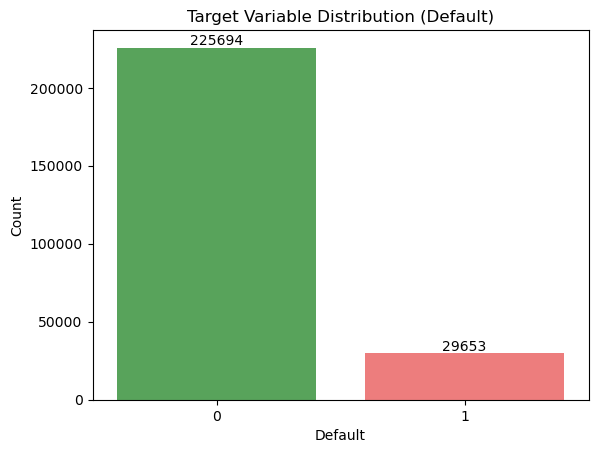

In [19]:
counts = df['Default'].value_counts().sort_index()

ax = sns.barplot(
    x=counts.index,
    y=counts.values,
    hue=counts.index,
    palette=['#4CAF50', '#FF6B6B'],
    legend=False
)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Target Variable Distribution (Default)")
plt.xlabel("Default")
plt.ylabel("Count")

In [20]:
counts = df['Default'].value_counts(normalize=True)
counts

Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64

## 3.2 Numerical Feature Analysis

The numerical features were analyzed earlier as part of the exploratory data analysis to understand their individual distributions, scale differences, and potential outliers. This analysis focused on identifying patterns that could inform preprocessing decisions rather than establishing direct predictive relationships.

The following aspects were examined:

- Distribution shape and spread using histograms.
- Presence of skewness or extreme values using boxplots.
- Variability across features with different scales.

Key observations from the numerical feature analysis include:

- Most numerical features exhibit wide and relatively uniform distributions, with no strong concentration in specific value ranges.
- No single numerical feature shows strong individual separation or dominance when analyzed in isolation.
- Certain features (e.g., Income and LoanAmount) display large variance, indicating that feature scaling will be necessary for models sensitive to feature magnitude.
- The absence of extreme outliers suggests that aggressive outlier treatment may not be required at this stage.

Overall, this analysis indicates that numerical features alone may not be sufficient to distinguish defaulters from non-defaulters. Instead, meaningful predictive signal is likely to emerge through feature interactions or non-linear modeling approaches.

To avoid redundancy, the numerical distribution plots are not repeated in this section, and insights from the earlier exploratory analysis are referenced directly.


## 3.3 Categorical Features vs Target

This subsection analyzes the relationship between categorical features and the target variable (`Default`) to identify category-level patterns associated with loan default risk. Unlike numerical features, categorical variables may reveal risk signals through differences in default rates across categories.

The analysis focuses on understanding how default behavior varies across different categorical feature values and whether certain categories are associated with higher or lower default risk.

---

### Analysis Approach

For each categorical feature:

- Compare the distribution of defaulters and non-defaulters across categories.
- Examine default rates within each category.
- Identify categories that may be associated with elevated or reduced default risk.


In [29]:
df.columns = df.columns.str.lower()

In [32]:
categorical = ['education','employmenttype','maritalstatus','hasmortgage','hasdependents','loanpurpose','hascosigner'] 

In [43]:
for col in categorical:
    print(f"\nDefault rate by {col}")
    
    summary = (
        df.groupby(col)['default']
        .agg(
            total_count='count',
            default_count='sum',
            default_rate='mean'
        )
        .sort_values('default_rate', ascending=False)
    )
    
    display(summary)



Default rate by education


,total_count,default_count,default_rate
education,,,
High School,63903,8230,0.128789
Bachelor's,64366,7789,0.121011
Master's,63541,6908,0.108717
PhD,63537,6726,0.105860



Default rate by employmenttype


,total_count,default_count,default_rate
employmenttype,,,
Unemployed,63824,8650,0.135529
Part-time,64161,7677,0.119652
Self-employed,63706,7302,0.114620
Full-time,63656,6024,0.094634



Default rate by maritalstatus


,total_count,default_count,default_rate
maritalstatus,,,
Divorced,85033,10657,0.125328
Single,85012,10127,0.119124
Married,85302,8869,0.103972



Default rate by hasmortgage


,total_count,default_count,default_rate
hasmortgage,,,
No,127670,15761,0.123451
Yes,127677,13892,0.108806



Default rate by hasdependents


,total_count,default_count,default_rate
hasdependents,,,
No,127605,16237,0.127244
Yes,127742,13416,0.105024



Default rate by loanpurpose


,total_count,default_count,default_rate
loanpurpose,,,
Business,51298,6323,0.123260
Auto,50844,6041,0.118814
Education,51005,6038,0.118381
Other,50914,6002,0.117885
Home,51286,5249,0.102348



Default rate by hascosigner


,total_count,default_count,default_rate
hascosigner,,,
No,127646,16423,0.128661
Yes,127701,13230,0.103601


1. features such as 'Income', 'loanAmount' and 'CreditScore' are large values compared to target variable default
2. 'loanid' is a an Id which will not affect our target variable so no use of this column
3. 'Education' is sort of important because higher the study done, then the chances of good paying job is high but not necessariley, sometime people does the buisness and pay the loan
4. 'Employment' is a good feature, if the person is unemployed then the chances of paying loan is tough unless someone pays
5. 'MaritalStatus' can suggest us that the person if married the expense is high but also shows high responsibility
6. 'HasMortgage' feature says whrther the perosn has mortaged a property or not, suggests that if mortgage is there then the person will have more burden in paying the loan
7. 'HasDependents' says if the person has dependedents then the expense of the person increases
8. 'HasCoSigner' says if there is a co-applicatant which decreases the chances of default
9. 'LoanPurpose' feature suggest for what purpose is the loan, 'Auto' loan shows we can keep as a security.
10. We can feature age as the age into numbers such as age between 18 to 69 into different age groups. 